### Name: Smitali Patnaik
### Date : 06/27/2022
### Assignment: Project 2- Part 2

#### This section of the project is about building a report about the employees. This report summarizes how much they sell,what products they are able to sell, their sales performance across years and how they do in different regions, etc.This report investigates various statistics through graphs/tables and finds out what drives their performance and suggestions on how performance can be improved. Most of the stats have been captured through pivot table plots and few summary tables as dataframe sums /means is used as per requirement.


##### Connecting to the sqlite database and summarizing the  various tables inside the database

In [15]:
import pandas as pd
import numpy as np
import sqlite3

con = sqlite3.connect("C:/Users/smipa/Downloads/northwind.sqlite")

In [16]:
## Reading the summary of tables from the sqlite file
df=pd.read_sql('SELECT * FROM sqlite_schema WHERE type = "table"', con)
print(df)

     type                  name              tbl_name  rootpage  \
0   table            Categories            Categories         2   
1   table       sqlite_sequence       sqlite_sequence         3   
2   table  CustomerCustomerDemo  CustomerCustomerDemo        28   
3   table  CustomerDemographics  CustomerDemographics        30   
4   table             Customers             Customers        32   
5   table             Employees             Employees        38   
6   table   EmployeeTerritories   EmployeeTerritories        68   
7   table         Order Details         Order Details        70   
8   table                Orders                Orders        92   
9   table              Products              Products       128   
10  table               Regions               Regions       132   
11  table              Shippers              Shippers       133   
12  table             Suppliers             Suppliers       134   
13  table           Territories           Territories       13


#### The first step in the study is to see the employees table. This step will show how many employees are there, how many sales representatives are there. The Employee ID , Employee , First Name , LastName and title is the important information being looked at. Total number of employees holding each title is counted here.

#### As we see below there are 6 sales representatves with 1 Vice President , 1 Sales Manager & an Inside sales coordinater

In [3]:
# Read employees table
df_employees=pd.read_sql("SELECT * from Employees", con)
df_employees_1=df_employees[['EmployeeID','FirstName','LastName','Title','ReportsTo']]
print(df_employees_1)
print(df_employees_1['Title'].value_counts())

   EmployeeID FirstName   LastName                     Title  ReportsTo
0           1     Nancy    Davolio      Sales Representative        2.0
1           2    Andrew     Fuller     Vice President, Sales        NaN
2           3     Janet  Leverling      Sales Representative        2.0
3           4  Margaret    Peacock      Sales Representative        2.0
4           5    Steven   Buchanan             Sales Manager        2.0
5           6   Michael     Suyama      Sales Representative        5.0
6           7    Robert       King      Sales Representative        5.0
7           8     Laura   Callahan  Inside Sales Coordinator        2.0
8           9      Anne  Dodsworth      Sales Representative        5.0
Sales Representative        6
Vice President, Sales       1
Sales Manager               1
Inside Sales Coordinator    1
Name: Title, dtype: int64


#### Other tables are read below to know about Orders, Orders are sold at what locations , Amount of sales , Categoryof products. These tables will be combined through merge and all the calculations like merge , sum etc along with the plots will be performed using this. The tables read are summarized in comments.

In [4]:

# Orders table. This has the log of all the orders with shipping date, price date of order , supply etc.
df_orders=pd.read_sql("SELECT * from Orders", con)
# We are taking useful variables from here.
df_orders=df_orders[['OrderID','CustomerID','EmployeeID','ShippedDate','ShipCountry']]

#Order totals has the total salses amount for each order category. This is an easy table to get the overall amount for each order.
df_order_sub=pd.read_sql("SELECT * from 'Order Subtotals' ", con)

# The products and Categories tables has the log of categories and products. They help in getting info on what products come onto which category.
df_products=pd.read_sql("SELECT * from Products", con)
df_categories=pd.read_sql("SELECT * from Categories", con)

#Order details extended is more detailed version of orders table. It used here to get some information on dicounts, unit pricez ,quantity and overall price  against every ProductID.
df_ord_detext=pd.read_sql("SELECT * from 'Order Details Extended' ", con)

#### I am cleaning one of the tables here from the merge operation this is to get the total amount of sales done by each employee for Orders. This also contains which year the sales was done and to which country shippping was done.

#### So the output dataframe has EmployeeID, OrderID , ShipCountry (to the region where sales eas made) , Year on which sales was made and the overall sales amount for each OrderID.

In [5]:
import datetime as dt

df_employees_orders=pd.merge(df_employees_1, df_orders, on='EmployeeID',  how='inner')
df_employees_salesamt=pd.merge(df_employees_orders, df_order_sub, on='OrderID',  how='inner')

df_employees_salesamt['ShippedDate'] = pd.to_datetime(df_employees_salesamt['ShippedDate'])
df_employees_salesamt['Year'] = df_employees_salesamt['ShippedDate'].dt.year
df_employees_salesamt=df_employees_salesamt[['EmployeeID','OrderID','ShipCountry','Year','Subtotal']]

print(df_employees_salesamt)

     EmployeeID  OrderID ShipCountry    Year  Subtotal
0             1    10258     Austria  1996.0  1614.880
1             1    10270     Finland  1996.0  1376.000
2             1    10275       Italy  1996.0   291.840
3             1    10285     Germany  1996.0  1743.360
4             1    10292      Brazil  1996.0  1296.000
..          ...      ...         ...     ...       ...
825           9    10978     Belgium  1998.0  1303.195
826           9    11016          UK  1998.0   491.500
827           9    11017     Austria  1998.0  6750.000
828           9    11022      Brazil  1998.0  1402.000
829           9    11058     Germany     NaN   858.000

[830 rows x 5 columns]


#### EMPLOYEE SALES AMOUNT- OVERALL 

#### Total amount of sales is summarized in this graph for each employee combining all the years in total.
#### The dataframe uses groupby feature to get the overall sales amount for each employee.
#### In 3 years of period EmployeeID 4 made the maximum sales, while EmployeeID 5 made the minimum sales.


                Subtotal
EmployeeID             
1           192107.6045
2           166537.7550
3           202812.8430
4           232890.8460
5            68792.2825
6            73913.1295
7           124568.2350
8           126862.2775
9            77308.0665
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='EmployeeID')


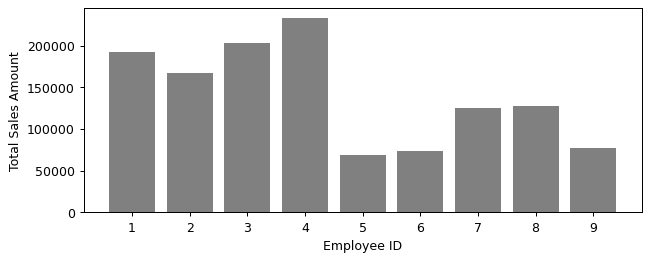

In [6]:

df_emp_tot_sales=df_employees_salesamt[['EmployeeID','Subtotal']]
df_emp_tot_sales=df_emp_tot_sales.groupby('EmployeeID').sum()
print("\n",df_emp_tot_sales)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 3), dpi=90)  
 
x=df_emp_tot_sales.index # to ease the plots.
print(x)
y=df_emp_tot_sales['Subtotal']
plt.bar(x,y,color='grey')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Employee ID') 
plt.ylabel('Total Sales Amount') 
# Show the plot
plt.show()

#### EMPLOYEE SALES PERFORMANCE ACROSS THE YEARS.

#### Similarly inorder to get idea of the sales made by each employee every year. A bar graph is used again to compare trends for every year. EmployeeID-4 did perform well in the year 1996 and 1997, due to which overall totals were high, However, in the year 1998 EmployeeID-3 has shown maximum sales. It was also observed that maximum sales ere made by all the employees except EmployeeID-9 in the year 1997, when comapred with 1996 & 1998 sales.

#### The groupby option is used here on previous table along with unstack function to plot the graphs.But an addtional category of 'Year' has been added to get yearly breakups. 

Yearly Sales by Each Employee
 EmployeeID  Year  
1           1996.0     30861.7650
            1997.0     95850.3925
            1998.0     60565.2265
2           1996.0     17811.4600
            1997.0     71168.1400
            1998.0     73790.1800
3           1996.0     18223.9600
            1997.0    103719.0915
            1998.0     80869.7915
4           1996.0     49945.1150
            1997.0    124655.5685
            1998.0     51163.0125
5           1996.0     17667.2000
            1997.0     31433.1875
            1998.0     19691.8950
6           1996.0     14519.6850
            1997.0     40826.3725
            1998.0     17181.5720
7           1996.0     15232.1600
            1997.0     59827.1950
            1998.0     44559.8950
8           1996.0     19160.7000
            1997.0     56954.0350
            1998.0     47727.9425
9           1996.0      9894.5150
            1997.0     24412.8925
            1998.0     42142.6590
Name: Subtotal, dtype: float64


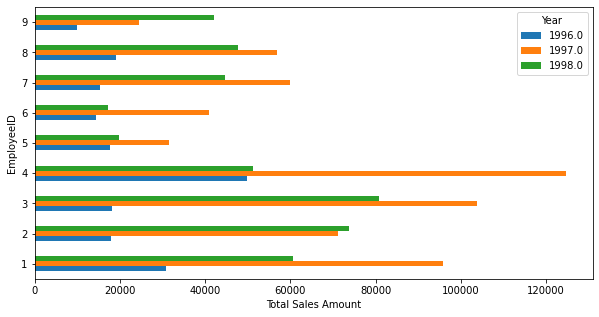

In [7]:
df_yearly_sales=df_employees_salesamt.groupby(['EmployeeID','Year'])['Subtotal'].sum()
df_yearly_sales.unstack().plot.barh(figsize=(10,5),stacked=False)
print("Yearly Sales by Each Employee\n", df_yearly_sales)
plt.xlabel('Total Sales Amount') 
plt.show()

#### The products and  categories table read above have also been now merged together with employees and orders tables. Only relevent data has been retained here for study. This includes information on the EmployeeID, 

In [8]:
df_prod_cat=pd.merge(df_products,df_ord_detext, on='ProductID',  how='inner')
df_prod_cat=df_prod_cat[['ProductID','CategoryID','Quantity','OrderID','Discount','ExtendedPrice']]

print("Product & Categories merged:\n" ,df_prod_cat)
df_emp_sales_cat=df_employees_salesamt[['ShipCountry','EmployeeID','OrderID','Year','Subtotal']]

df_emp_prod_sale=pd.merge(df_emp_sales_cat,df_prod_cat, on='OrderID',  how='inner')
df_emp_prod_sale_cat=pd.merge(df_emp_prod_sale,df_categories, on='CategoryID',  how='inner')
df_emp_prod_sale_cat=df_emp_prod_sale_cat.drop('Picture',axis=1)
print("\n\n\n Employees table from above merged with products,categories:\n",df_emp_prod_sale_cat)



Product & Categories merged:
       ProductID  CategoryID  Quantity  OrderID  Discount  ExtendedPrice
0             1           1        45    10285      0.20          518.4
1             1           1        18    10294      0.00          259.2
2             1           1        20    10317      0.00          288.0
3             1           1        15    10348      0.15          183.6
4             1           1        12    10354      0.00          172.8
...         ...         ...       ...      ...       ...            ...
2150         77           2        30    11000      0.00          390.0
2151         77           2        18    11015      0.00          234.0
2152         77           2        10    11060      0.00          130.0
2153         77           2        28    11068      0.15          309.4
2154         77           2         2    11077      0.00           26.0

[2155 rows x 6 columns]



 Employees table from above merged with products,categories:
      ShipCountry

#### WHAT EMPLOYEES SELL- Categories of Items and Quantity sold by each employee.


#### The products list is too large to capture but as they are categorized into broader groups. This information was used to what are the items captured here in broader terms.

####  The plot below shows the categories of products sold by each employee in course of three years. The y-axis indicates the quantity sold for every category. The information has been summarised using pivot table and plotted as line plot to capture every employeee in the table.

#### EmployeeID-4 has sold maximum quantities of every category except the dairy products. Dairy products have been sold in highest quantity by EmployeeID-1. Overall lowest quantities were sold for produce,meat & poultry ,grains & cereals and condiments. EmployeeID-5 who had lowest sales sold aat par quantities for all items with other employees. But lowest quantities were reported for beverages and condiments. 


                          sum
CategoryName EmployeeID      
Beverages    1           1607
             2           1069
             3           1310
             4           1572
             5            421
...                       ...
Seafood      5            393
             6            509
             7            555
             8            738
             9            404

[72 rows x 1 columns]


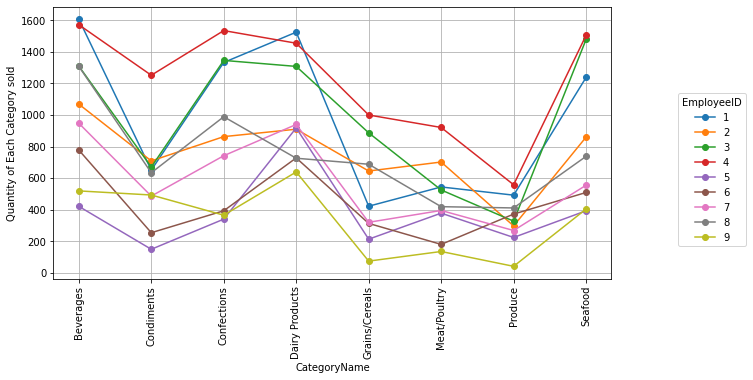

In [9]:

df_emp_prod_sale_sum=df_emp_prod_sale_cat.groupby(['CategoryName','EmployeeID'])['Quantity'].agg(['sum'])
print(df_emp_prod_sale_sum)

xx_axis=df_categories['CategoryName'].to_list()

ax=df_emp_prod_sale_sum.pivot_table(values="sum", index="CategoryName", columns="EmployeeID").plot(figsize=(10,5),marker='o')
ax.legend(loc='lower right',bbox_to_anchor =(1.25, 0.1),title='EmployeeID')
plt.ylabel('Quantity of Each Category sold')
plt.xticks(ticks=df_categories.index,rotation=90)
plt.grid()
plt.show()



#### EMPLOYEE PERFORMANCE - REGIONWISE.

#### Maximum Sales were made in USA by EmployeeID-2.Countries like Germany, Mexico , Portugal, Venezuela showed lower sales in terms of amount. This can attributed to population ,country size and income as well. However, EmployeeID 4 really made significant sales in Ireland.The amount is close of what EmployeeID 3 sold in USA. The reason for this needs to be investogated through the products being sold and what prices are offered for the products. There is a possbility that lower unit prices can lead to more sales. Or the demand in these countries can be more, which requires quantities of items to be checked.

<Figure size 432x288 with 0 Axes>

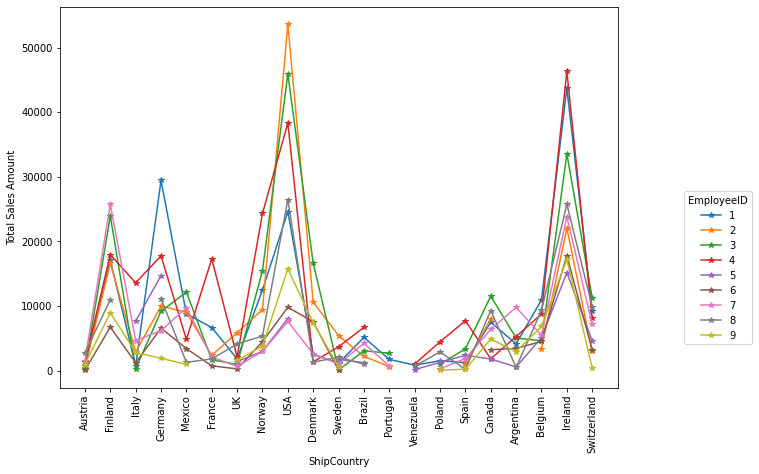

In [10]:
plt.gcf()
regions=pd.DataFrame()
regions['ShipCountry']=df_emp_prod_sale_cat['ShipCountry'].unique()
regions.set_index('ShipCountry')
x_labels=list(regions['ShipCountry'])
df_sales_region=df_emp_prod_sale_cat.groupby(['ShipCountry','EmployeeID'])['ExtendedPrice'].sum()
ax=df_sales_region.unstack().plot(figsize=(10,7),marker='*')
plt.xticks()
plt.xticks(regions.index,rotation='vertical',labels=x_labels)
ax.legend(loc='lower right',bbox_to_anchor =(1.25, 0.1),title='EmployeeID')
plt.ylabel('Total Sales Amount') 
plt.show()

#### We want to see the impact of unit price of every product over the sales. For this mean unit price of each product has been taken and compared with the total amount of sales 'Extended Price' which is the unitprice x (1-discount) x quantity.The mean unit price has been considered here same product was sold because it was observed from the data that there are is unitprice for same productID in different OrderIDs. 

#### The maximum sales was made for ProductID with mean unit price of ~USD 48, as we revenue in y axis close to ~ USD 1600 (currencies assumed to in USD). ProductID with highest mean unit price gave amounted to ~USD 600. Most of the items within USD 50 gave stable amount between USD 100 to USD 1200. So the question arises , whether there could be relation between regions and categories of products. As the scatter plot does not give sufficient information on these aspects.


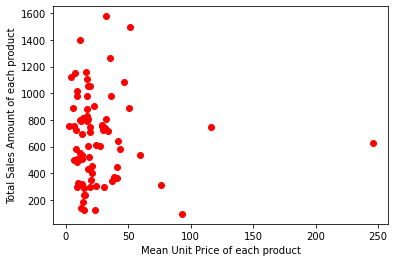

In [11]:

df_unit_price_amt=df_ord_detext[['ProductID','UnitPrice','Quantity','Discount','ExtendedPrice']]
                                 
df_unit=df_unit_price_amt.groupby('ProductID')['UnitPrice'].agg(['mean']) 
df_amt=df_unit_price_amt.groupby('ProductID')['Quantity'].agg(['sum']) 
df_net=pd.merge(df_unit,df_amt, on='ProductID',  how='inner')
ax=plt.scatter(df_net['mean'], df_net['sum'], c='red', marker='o')
plt.xlabel('Mean Unit Price of each product') 
plt.ylabel('Total Sales Amount of each product') 
plt.show()

#### WHAT PRODUCTS EMPLOYEES SELL - Captures relation to other variables like unit price and discounts.

#### Three graphs have been plotted here to understand sales performance with respect to unit price and discount offered by each employee to assess overall sales performance.

#### The first plot is a pivot table plotted against mean unit price offered by each employee for all categories. The second plot is the overall sales amount (same as the first bar graph plotted in the report). This for comparing against unit price and discounts given. The third plot is the mean discount offered by each employee for all categories.



<Figure size 432x288 with 0 Axes>

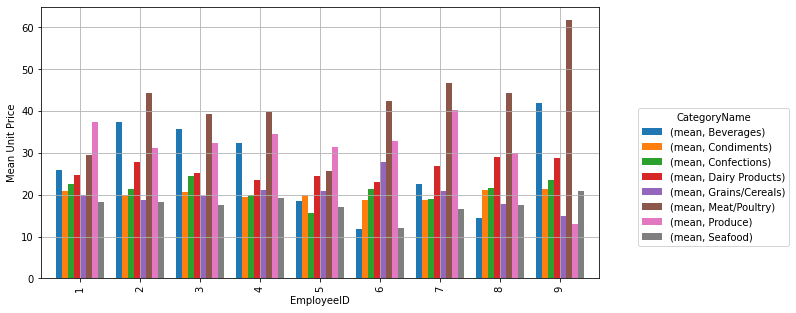

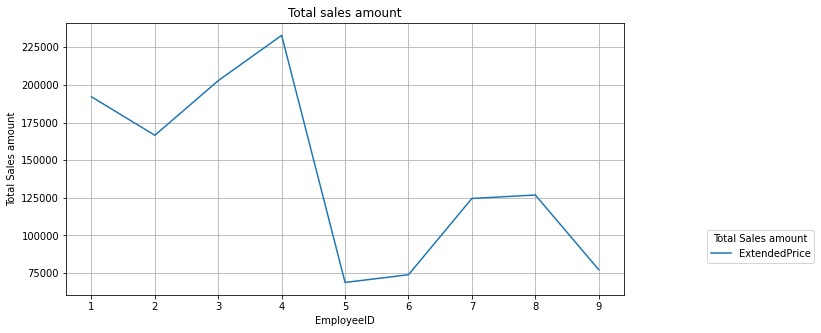

<Figure size 432x288 with 0 Axes>

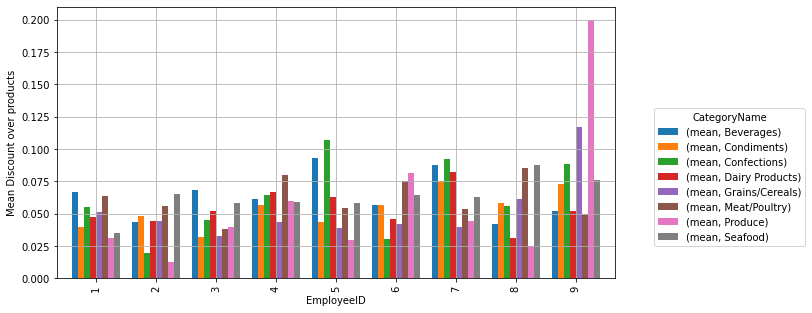

In [12]:
df_emp_unit_net=df_emp_prod_sale_cat.copy()
df_emp_unit_net['Price']=df_emp_prod_sale_cat['ExtendedPrice']/df_emp_prod_sale_cat['Quantity']
df_emp_unit_net1=df_emp_unit_net.groupby(['EmployeeID','CategoryName'])['Price'].agg(['mean'])
df_emp_unit_net2=df_emp_unit_net.groupby(['EmployeeID'])['ExtendedPrice'].sum()
df_emp_unit_net3=df_emp_unit_net.groupby(['EmployeeID','CategoryName'])['Discount'].agg(['mean'])
#fig=plt.figure(1,figsize=(10,5))
#ax=plt.plot(x,y,color='black')
#fig=plt.figure(2,figsize=(11,5))

plt.figure(1)
ax=df_emp_unit_net1.unstack().plot.bar(figsize=(10,5),width=0.8)
plt.legend(loc='lower right',bbox_to_anchor =(1.35, 0.1),title='CategoryName')
plt.ylabel('Mean Unit Price')
plt.grid()
plt.show()

plt.figure(2)
df_emp_unit_net2.plot(figsize=(10,5),title='Total sales amount')
plt.legend(loc='lower right',bbox_to_anchor =(1.35, 0.1),title='Total Sales amount')
plt.ylabel('Total Sales amount')
plt.grid()
plt.show()


plt.figure(3)
ax2=df_emp_unit_net3.unstack().plot.bar(figsize=(10,5),width=0.8)
plt.legend(loc='lower right',bbox_to_anchor =(1.35, 0.1),title='CategoryName')
plt.grid()
plt.ylabel('Mean Discount over products')
plt.show()

In [13]:
df_sales_reg=df_emp_prod_sale_cat.groupby(['ShipCountry','CategoryName'])['Quantity'].sum()
print(df_sales_reg)                      

ShipCountry  CategoryName  
Argentina    Beverages          82
             Condiments         45
             Confections        57
             Dairy Products     54
             Grains/Cereals     20
                              ... 
Venezuela    Dairy Products    555
             Grains/Cereals    244
             Meat/Poultry      192
             Produce           150
             Seafood           592
Name: Quantity, Length: 165, dtype: int64


#### The quantities supplied for all categories have been summarized for every region. Germany and USA seem to be overall top consumers of the products. With Dairy Products and Beverages having almost close consumption for both countries. This Indicates , most of the employees have made maximum sales in these regions. Countries like Mexico, Norway , Poland have shown lower demand of items. Australia and Brazil show moderate demand for the items overall.

<Figure size 432x288 with 0 Axes>

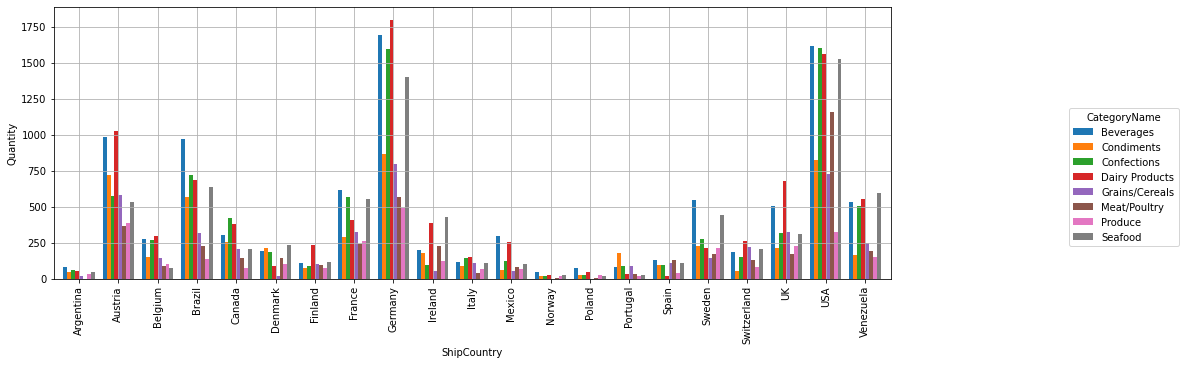

In [14]:
plt.figure(1)
ax=df_sales_reg.unstack().plot.bar(figsize=(15,5),width=0.8)
plt.legend(loc='lower right',bbox_to_anchor =(1.35, 0.1),title='CategoryName')
plt.grid()
plt.ylabel('Quantity')
plt.show()

####  SUMMARY AND SUGGESTIONS.

#### From above analysis, it was noted that EmployeeID-4 made highest sales in terms of amount. And also made maximum sales for all categories except dairy. The hohest sales were made in Ireland and USA. Also , mean unit price offered was not very low. Also, discount offered for items was comparitviely less than what EmployeeID 5 offered. 
#### This raises question as to why EmployeeID 5 and also EmployeeID-9 were lowest performing, inspite of offering significant discounts.  EmployeeID-5 is at a managing position and this can attributed to the reason that, EmployeeID-5 is not into direct sales. For employeeID-9 improvement in the performance is required in terms of the discount being offered, which is very high and quantities being sold is very less. The employees having lower sales can boost up their sales in regions with higher demand like Germany and USA. And focus increasing sales in promising markets like Australia and Brazil.

